<a href="https://colab.research.google.com/github/ssfr91/machine_learning_refined/blob/main/lab1_intro_to_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Solid Mechanics**

# **Lab Section 1: Introduction to Supervised Learning**

Progammer/Guest Instructor: Mian Xiao (mianxiao1995@gmail.com, mx2235@columbia.edu)

## **Outline**

1. Least-squares regression

2. Solutions to a regression problem

3. Deep feed-forward neural network example: multi-layer perceptron (MLP)

4. Program your machine learning problem with PyTorch

5. Visualize the results

6. Practice with machine learning modeling

## **Least Squares Regression**

In this section we would like to first discuss what **regression** is. Regression is a statistical method that attempts to determine the relationship between dependent variables (usually denoted by $y$) and a series known independent variables (usually denoted by $x$).

One easy way to understand regression is to interpret it as **function fitting**, where you assume that $y \approx \hat{f}(x)$ and the target of your problem is to determine what $\hat{f}(x)$ is.

In a regression problem, we are usually given a training dataset consists of two parts: **input set** (collection of $x$) and **label set** (observed $y$ value at corresponding $x$ value).

To complete the problem definition, we define the mean squares error (MSE) loss function as:

$$ \mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{f}(x_i)|^2 \approx \mathbb{E}(|y - \hat{f}(x)|^2)$$
where $N$ indicates the size of training dataset. The MSE is an empricial loss function and as n increases, it should converge to the population loss.

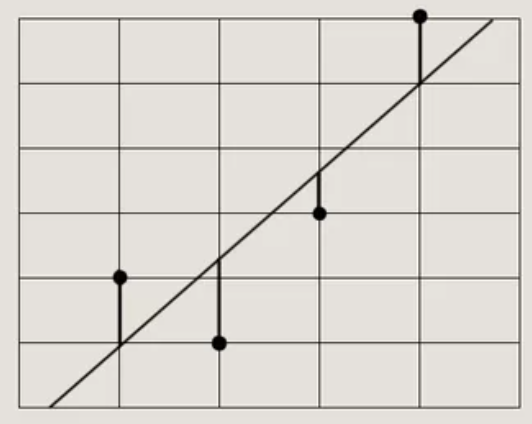

This loss function quantifies the **"best fit"** as a minimizer of the loss function. We call the regression problems that minimize the MSE loss as *least squares regression*. The MSE loss is also the mostly adopted loss function in regression problems.


### **In-Class Discussion:**
Q1: How do you know $N$ is large enough?

Q2: How does the sampling policy on $x_i$ affects the performance?

## **Solutions to A Regression Problem**

### **Cases where you have direct solutions**

When a direct solution to the regression problem of interest is available, this means that the global minimizer to the loss function can be derived analytically.

Suppose that the assumed function $\hat{f}$ is a linear combination of a set known smooth functions of the independent variables, such as *power functions*, *sine functions*, *exponential function* and so on. In general, the function approxiamtor can be expressed by the dot product of a **"feature map"** and a coefficient vector:
$$ \hat{f}(x) = \phi^T(x) \cdot c $$
where $\phi(x)$ is called the *feature map*, a vector of known smooth functions w.r.t the input $x$.

For example, you can write a cubic function in this way if you prescribe:
$$ \phi^T(x) = \left[ 1\:\: x\:\: x^2\: x^3 \right],\quad c^T = \left[ c_0\:\: c_1\:\: c_2\:\: c_3 \right] $$

If $\hat{f}(x)$ is defined in this way, we can express the MSE loss in the following matrix form:
$$ \frac{1}{N} (\Phi\cdot c - Y)^T \cdot (\Phi\cdot c - Y) $$
where $\Phi$ is called the feature matrix and $Y$ is called the label vector. $\Phi$ and $Y$ are actually stacked from $\phi^T(x_i)$ and $y_i$ row by row as follows:
$$\Phi = \left[\begin{matrix}
\phi^T(x_1) \\ \phi^T(x_2) \\ \vdots \\ \phi^T(x_N)
\end{matrix}\right],\quad
Y = \left[\begin{matrix}
y_1 \\ y_2 \\ \vdots \\ y_N
\end{matrix}\right] $$

The gradient w.r.t. coefficient vector $c$ is derived as:
$$ \frac{\partial \mathcal{L}_{MSE}}{\partial c} = \frac{2}{N}(\Phi^T\Phi\cdot c - \Phi^T\cdot Y) $$

Enforcing this gradient to zero yields the normal equation commonly used in linear regression and kernel regression for solving the coefficients:
$$ c = (\Phi^T\Phi)^{-1} \cdot \Phi^T\cdot Y $$


### **Cases where you *do not* have direct solutions**

The case mentioned in the previous section is not often realistic in pratice, because you may have highly nonlinear correlations between coefficients, making it unable to derive a explicit gradient equation for solving $c$.

Analytical expression for $\frac{\partial \mathcal{L}_{MSE}}{\partial c}$ may not be available, but it could still be feasible to evaluate this gradient value **numerically**, using either [auto-differentiation](https://marksaroufim.medium.com/automatic-differentiation-step-by-step-24240f97a6e6) or [finite difference](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html).

We then introduce the **gradient descent** method for minimizing $\mathcal{L}_{MSE}$, which is widely used in optimization:

* Given a learning rate $\eta$.
* Initialize the coefficients: $c = c_0$,
* while **not converge**
  * Do $c = c - \eta\frac{\partial \mathcal{L}_{MSE}}{\partial c}$

**Remarks**

1. In modern machine learning, $\mathcal{L}_{MSE}$ and $\frac{\partial \mathcal{L}_{MSE}}{\partial c}$ are no longer evaluated utilizing the entire training dataset, but a randomly sampled portion fo the training dataset. This is called **minibatching** of the training dataset, and the revised gradient descent method is called **stochastic gradient descent** method.

2. The gradient descent update equation in the algorithm can be modified to improve the convergence behavior, which yields a series of optimization algorithm in machine learning, such as *RMSProp*, *Adam* ... Our program tends to use one of these improved algorithms for better training performance. [extension read](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=An%20optimizer%20is%20a%20function,loss%20and%20improve%20the%20accuracy.)

## **Deep Neural Networks and Multi-Layer Perceptron**

In reality, it is difficult to make correct assumption about the functional relationship between your input variables and the target variable. Instead, we call for a **universal** function approxiamtor with sufficient representation power to fit the target function. It can be shown that deep neural network functions has such abilities.

We start from one of the simplest neural network architectures: **multi-layer perceptron (MLP)**, which is also widely-used in application.

MLP is composed of layers. In the $j$-th individual layer the following mathematical operations are performed:

1. linear transformation on the input taken from the previous layer:
$$ z^{(j)} = W^{(j)} h^{(j-1)} + b^{(j)} $$

2. nonlinear activation:
$$ h^{(j)} = \mathrm{act}^{(j)}(z^{(j)}) $$

**Remarks**:

1. We usually adopt the **recitified linear unit function (ReLU)** as the activation function:
$$ \mathrm{ReLU}(x) = x\:\: \mathrm{if}\: x > 0\:\: \mathrm{else}\: 0. $$
There are other type of activation like *sigmoid* and *tanh* [extension reads](https://en.wikipedia.org/wiki/Activation_function). We will discuss pros and cons of these activation functions later.

2. Activation function must be **nonlinear**.

3. In the **first** layer (input layer) of MLP, $h^{(j-1)}$ is replaced by the function **input $x$**.

4. In the **last** layer (output layer) of MLP, activation is usually **not applied** and $h^{(j)}$ correspond to the function output $\hat{f}(x)$.


## Implementation with [*PyTorch*](https://pytorch.org)

*PyTorch* is an open source machien learning platform that accelerates your development progress, so that you are no longer forced to implement tedious routines in back-propagation. Implementation of a regression problem is often decomposed into the following parts:

1. Prepare the training dataset.

2. Import libraries.

3. Define your neural network.

4. Define the data loader for minibatching.

5. Define your training configuration.

6. Write the gradient descent loop.

*PyTorch* also offer you a [quickstart program](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)  to get familiar with the platform. Let's start with the program!

**Dataset preparation**

Let's learn the Hook's law in 2D cases, where the stress and strain relation ship are given as follows:
$$ \left[\begin{matrix} \sigma_{11} & \sigma_{12} \\ \sigma_{21} & \sigma_{22} \end{matrix}\right] = \lambda (\varepsilon_{11} + \varepsilon_{22})
\left[\begin{matrix} 1 & 0 \\ 0 & 1 \end{matrix}\right] +
2\mu \left[\begin{matrix} \varepsilon_{11} & \varepsilon_{12} \\ \varepsilon_{21} & \varepsilon_{22} \end{matrix}\right],\quad
\varepsilon_{12} = \varepsilon_{21}, \sigma_{12} = \sigma_{21} $$

We are interested in the responses within the range of $-1 \leq \varepsilon_{11}, \varepsilon_{22} \leq 1$ and $-0.5\leq \varepsilon_{12} \leq 0.5$.

Assume the following material parameters: $\lambda = 2, \mu = 1.2$.

For convenience in machine learning pratice, we vectorize the tensors as $[\varepsilon_{11}\:\: \varepsilon_{12}\:\: \varepsilon_{21}\:\: \varepsilon_{22}]$ and $[\sigma_{11}\:\: \sigma_{12}\:\: \sigma_{21}\:\: \sigma_{22}]$ for input and output.

In [ ]:
# numpy library is required for numeric computation
# please refer to https://numpy.org/ if you have questions
import numpy as np

# grid density
Ngrid = 24
# x_1 and x_2 grid
e11_, e22_, e12_ = np.meshgrid( np.linspace(-1, 1, Ngrid+1), np.linspace(-1, 1, Ngrid+1), np.linspace(-.5, .5, Ngrid+1) )
e11_ = e11_.reshape(-1)
e22_ = e22_.reshape(-1)
e12_ = e12_.reshape(-1)

# material parameters
lambda_ = 2.0
mu_ = 1.2
# define the target function
def elas_func(e11, e22, e12):
  ev = e11 + e22
  return lambda_*ev + 2*mu_*e11, lambda_*ev + 2*mu_*e22, 2*mu_*e12

s11_, s22_, s12_ = elas_func(e11_, e22_, e12_)
Xtrain = np.vstack([e11_, e12_, e12_, e22_]).T
Ytrain = np.vstack([s11_, s12_, s12_, s22_]).T

**Import libraries**

In [ ]:
import copy

import torch
# layers and model
from torch.nn import Module, Linear, ReLU
# loss function
from torch.nn import MSELoss
# for dataloader
from torch.utils.data import TensorDataset, DataLoader
# optimizer and scheduler
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
# for making plots
import matplotlib.pyplot as plt

# clear precision issues
torch.set_default_dtype(torch.float64)

**Define neural network**

In [ ]:
# hidden layer sizes: 128
# assume 3 hidden layers
class MLP(Module):
  def __init__(self, inp=1, out=1, hidden=128):
    super(MLP, self).__init__()
    self.fc1 = Linear(inp, hidden)
    self.fc2 = Linear(hidden, hidden)
    self.fc3 = Linear(hidden, hidden)
    self.fc4 = Linear(hidden, out)
    self.act = ReLU()

  def forward(self, x):
    h = self.act( self.fc1(x) )
    h = self.act( self.fc2(h) )
    h = self.act( self.fc3(h) )
    o = self.fc4(h)
    return o

model = MLP(inp=4, out=4, hidden=128)

**Define dataloader**

In [ ]:
# data batch size is 128
dataset = TensorDataset(torch.tensor(Xtrain), torch.tensor(Ytrain))
loader = DataLoader(dataset, batch_size=128)

**Training configuration**

In [ ]:
# optimizer
opt = Adam(model.parameters(), lr=1e-3)
# learning rate scheduler that makes loss decrease more smooth
sch = StepLR(opt, step_size=50, gamma=0.8)
# loss function
loss_fn = MSELoss()

# number of training iterations over the dataset
EPOCHS = 200
# define placeholders to store the NN states associate with the best performance
best_loss = np.inf
best_states = None
# cache the training history
loss_history = []

**Training loop**

In [ ]:
for t in range(EPOCHS):
  train_losses = []
  model.train()
  for batch_x, batch_y in loader:
    # feed forward step
    preds = model(batch_x)
    # check loss
    loss = loss_fn(batch_y, preds)
    # automatic gradients
    opt.zero_grad()
    loss.backward(retain_graph=False)
    # back propagation via the optimizer
    opt.step()
    # assemble the epoch loss
    train_losses.append( loss.detach().item() )

  # cache the NN states with the best performance
  epoch_loss = np.mean(train_losses)
  if epoch_loss < best_loss:
    best_loss = np.copy(epoch_loss)
    best_states = copy.deepcopy( model.state_dict() )
  # record loss history
  if (t+1) % 20 == 0: print("epoch {:4d}, training loss = {:1.5e}".format(t+1, epoch_loss))
  loss_history.append(epoch_loss)
  # adjust the learning rate
  sch.step()

# load the trained NN
model.eval()
model.load_state_dict(best_states)

epoch   20, training loss = 1.47880e-02
epoch   40, training loss = 4.59463e-03
epoch   60, training loss = 7.81633e-04
epoch   80, training loss = 3.47948e-03
epoch  100, training loss = 2.56737e-03
epoch  120, training loss = 2.08146e-03
epoch  140, training loss = 1.66182e-03
epoch  160, training loss = 2.54932e-03
epoch  180, training loss = 5.13259e-03
epoch  200, training loss = 2.05148e-03


<All keys matched successfully>

## **Visualization Pratice**

### **Training history**: plot the loss history over epochs

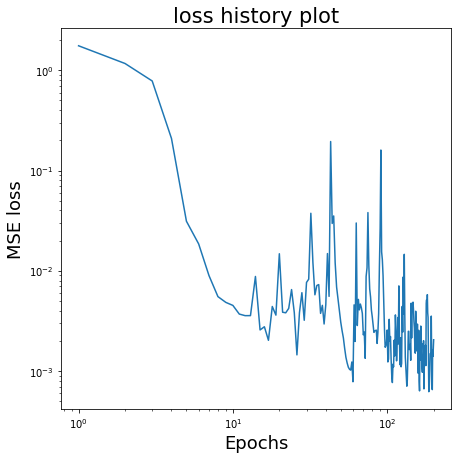

In [ ]:
plt.figure(0,figsize=(7,7))
plt.loglog(np.arange(1,EPOCHS+1), loss_history)
plt.title('loss history plot', fontsize=21)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('MSE loss', fontsize=18)
plt.show()

### **Field solutions**: plot the predicted stress component field $\sigma_{11}$

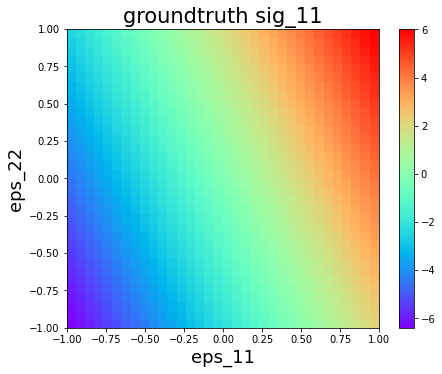

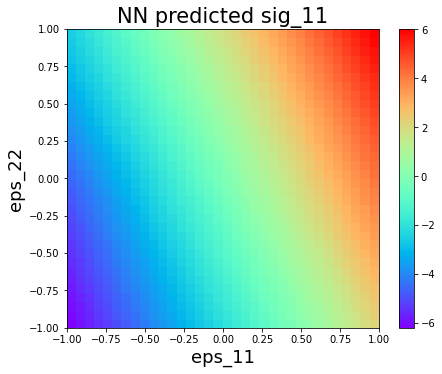

In [ ]:
# we first need to generate a grid for evaluating the prediction
test_grid = 34
# we only apply axial strains here
e11_test, e22_test = np.meshgrid( np.linspace(-1, 1, test_grid+1), np.linspace(-1, 1, test_grid+1) )
e11_test = e11_test.reshape(-1)
e22_test = e22_test.reshape(-1)
e12_test = np.zeros_like(e22_test)
# test true solutions
s11_test, s22_test, s12_test = elas_func(e11_test, e22_test, e12_test)
# prediction from trained NN
Xtest = np.vstack([e11_test, e12_test, e12_test, e22_test]).T
Ypred = model(torch.tensor(Xtest)).detach().numpy()
# arrange the data in grid for colormap plot
xx = e11_test.reshape(test_grid+1, test_grid+1)
yy = e22_test.reshape(test_grid+1, test_grid+1)
zz_true = s11_test.reshape(test_grid+1, test_grid+1)
zz_pred = Ypred[:,0].reshape(test_grid+1, test_grid+1)

plt.figure(0,figsize=(7,5.5))
plt.pcolor(xx, yy, zz_true, cmap='rainbow')
plt.title('groundtruth sig_11', fontsize=21)
plt.xlabel('eps_11', fontsize=18)
plt.ylabel('eps_22', fontsize=18)
plt.colorbar()
plt.show()

plt.figure(1,figsize=(7,5.5))
plt.pcolor(xx, yy, zz_pred, cmap='rainbow')
plt.title('NN predicted sig_11', fontsize=21)
plt.xlabel('eps_11', fontsize=18)
plt.ylabel('eps_22', fontsize=18)
plt.colorbar()
plt.show()

### (**Coding practice**): Can you try to plot the predicted stress component field $\sigma_{22}, \sigma_{12}$?

### **Testing**: make prediction of stress response on a prescribed strain path

Let's load it to a strain level of $\left[\begin{matrix} 0.4 & 0 \\ 0 & 0.2\end{matrix}\right]$ from zero strain in a radial path monotonically.

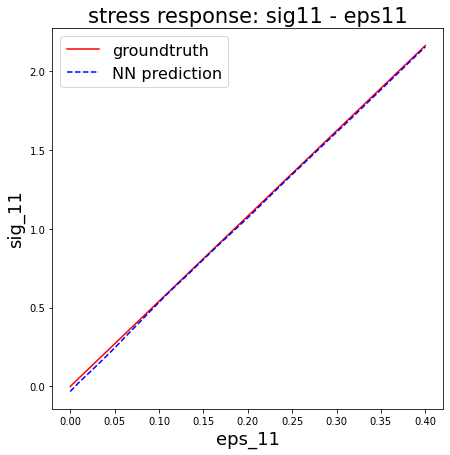

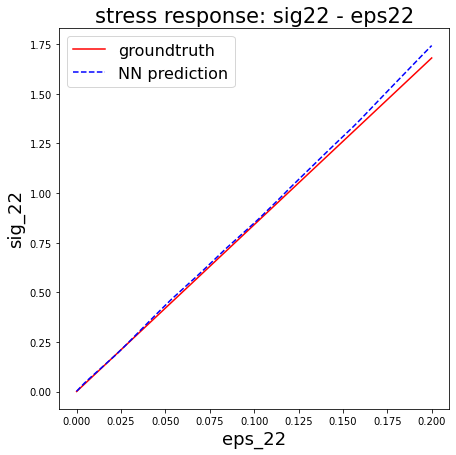

In [ ]:
# define load paths
Nsteps = 45
e11_load = np.linspace(0,  0.4, Nsteps+1)
e22_load = np.linspace(0,  0.2, Nsteps+1)
e12_load = np.zeros_like(e11_load)
# real stress response on this path
s11_load_true, s22_load_true, s12_load_true = elas_func(e11_load, e22_load, e12_load)
# predicted stress response on this path
Xload = np.vstack([e11_load, e12_load, e12_load, e22_load]).T
Ypred_load = model(torch.tensor(Xload)).detach().numpy()

plt.figure(0, figsize=(7,7))
plt.plot(e11_load, s11_load_true, 'r-', label='groundtruth')
plt.plot(e11_load, Ypred_load[:,0], 'b--', label='NN prediction')
plt.title('stress response: sig11 - eps11', fontsize=21)
plt.xlabel('eps_11', fontsize=18)
plt.ylabel('sig_11', fontsize=18)
plt.legend(fontsize=16)
plt.show()

plt.figure(1, figsize=(7,7))
plt.plot(e22_load, s22_load_true, 'r-', label='groundtruth')
plt.plot(e22_load, Ypred_load[:,3], 'b--', label='NN prediction')
plt.title('stress response: sig22 - eps22', fontsize=21)
plt.xlabel('eps_22', fontsize=18)
plt.ylabel('sig_22', fontsize=18)
plt.legend(fontsize=16)
plt.show()

## **Practice with machine learning modeling**

### 1. Can you figure out one problematic issue with this modeling?

EDIT YOUR ANSWER HERE.

### 2. (**Coding practice**) Can you try to parametrize the strain tensor in principal axes as a new dataset?

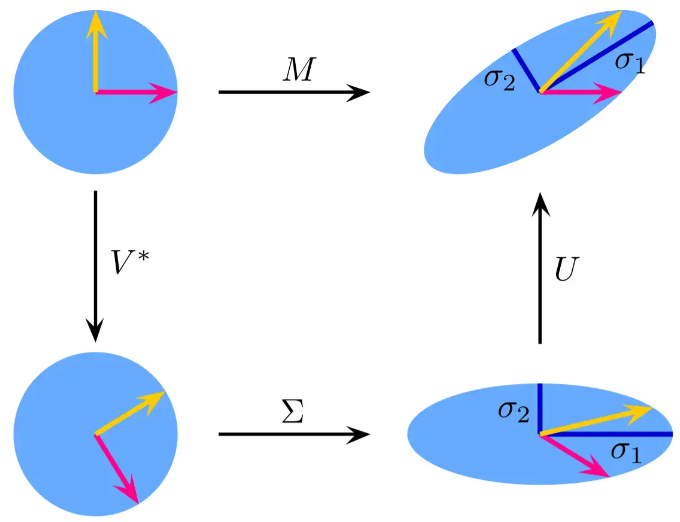

### 3. (**Coding pratice**) Train and visualize the same constitutive law with principal components.

### 4. Can you limit the trainable parameters in the neural network to 2, given the prior knowledge of linear elasticity? Try to reduce the neural network size to see what happens.

### 3. Tips to improve your performance

* Normalize (scale) your inputs and labels.
* Initialize neural network weights.
* Hyperparameter tuning: adjust hidden size, learning rate ... to obtain better convergence.
* Regularization on your loss function.